In [1]:
import numpy as np

In [2]:
import pymc4 as pm
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Eager

In [25]:
@pm.model(auto_name=True)
def t_test():
    mu = pm.Normal(0, 1)
    #sd = pm.HalfNormal(1)

model = t_test.configure()

model._forward_context.vars
func = model.make_log_prob_function()

In [30]:
@tf.function
def logp_array(array):
    #mu = array[0]
    with tf.GradientTape() as tape:
        tape.watch(array)
        logp = func(array)
    grad = tape.gradient(logp, array)
    #grad = tf.gradients(logp, array)
    return logp, grad

In [36]:
def logp_wrapper(array):
    #print('input', array)
    logp, grad = logp_array(tf.convert_to_tensor(array))
    #print('logp', logp.numpy())
    #print('grad', grad[0].numpy())
    return logp.numpy(), grad.numpy()

In [37]:
from pymc4._hmc import HamiltonianMC

In [47]:
size = 1

In [48]:
hmc = HamiltonianMC(logp_dlogp_func=logp_wrapper, size=size, adapt_step_size=False)

In [49]:
curr = np.ones(size, dtype='float32') * .05
posterior_samples = []
stats = []
for i in range(50):
    print(i)
    curr, stat = hmc.step(curr)
    posterior_samples.append(curr)
    stats.append(stat)
    
trace = np.array(posterior_samples)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [50]:
import seaborn as sns

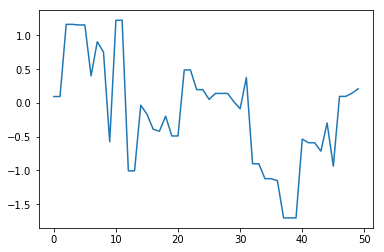

In [52]:
plt.plot(posterior_samples)

/Users/twiecki/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


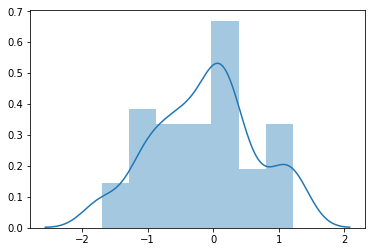

In [51]:
sns.distplot(posterior_samples)